In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

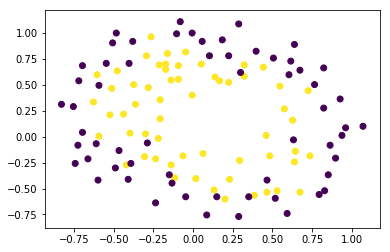

In [4]:
# 载入数据
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]
    
plt.scatter(x_data[:,0],x_data[:,1],c=y_data) 
plt.show()

In [5]:
#分割数据
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data) 

# 创建决策树模型
# max_depth，树的深度
# min_samples_split 内部节点再划分所需最小样本数
model = tree.DecisionTreeClassifier(max_depth=7,min_samples_split=4)
# 输入数据建立模型
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# 导出决策树
import graphviz # http://www.graphviz.org/

dot_data = tree.export_graphviz(model, 
                                out_file = None, 
                                feature_names = ['x','y'],
                                class_names = ['label0','label1'],
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)

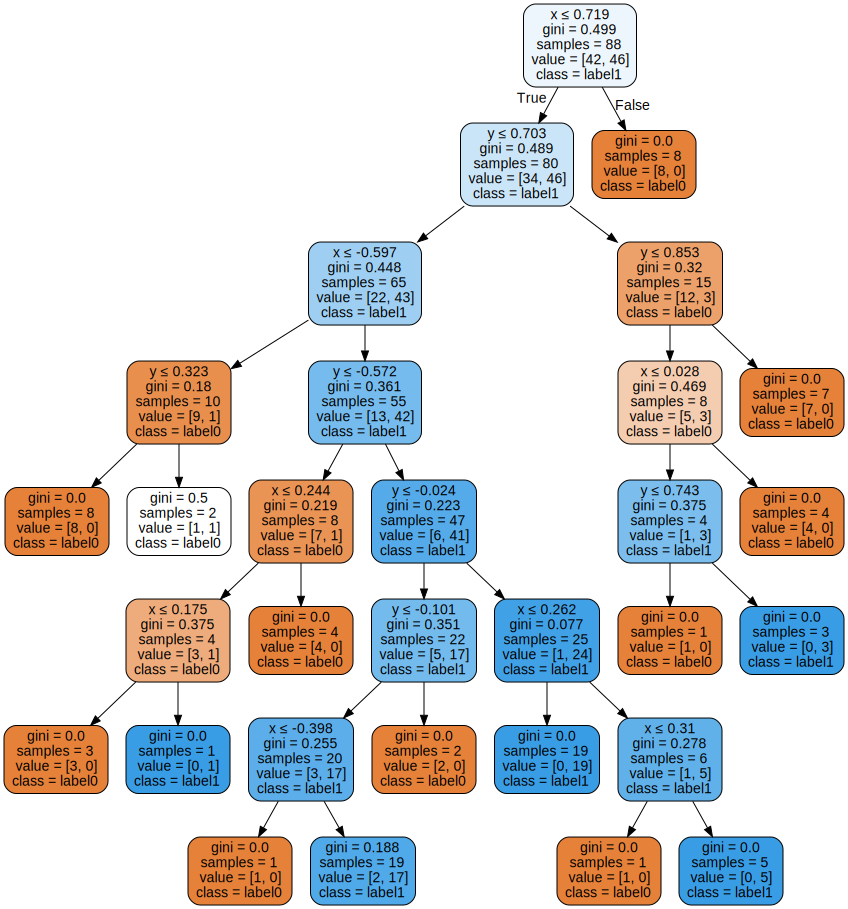

In [7]:
graph

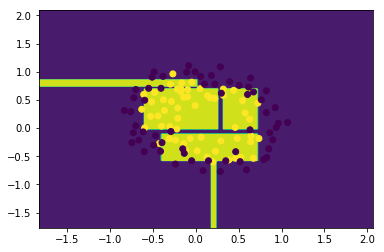

In [8]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [9]:
predictions = model.predict(x_train)
print(classification_report(predictions,y_train))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        41
         1.0       0.98      0.96      0.97        47

   micro avg       0.97      0.97      0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



In [10]:
predictions = model.predict(x_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72        18
         1.0       0.58      0.58      0.58        12

   micro avg       0.67      0.67      0.67        30
   macro avg       0.65      0.65      0.65        30
weighted avg       0.67      0.67      0.67        30

